<a href="https://colab.research.google.com/github/ThePyProgrammer/CS4232/blob/main/STAR%20Day%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Happy STAR Day, Mrs Lee!

The students from 404 would like celebrate this joyous day with the following Jupyter Notebook, with image processing done on an image of you. This is done following the Data Science Life cycle because we are amazing model students!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 8)

import cv2
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage import filters
import skimage.io as skio

from scipy import stats

In [ ]:
class Image:
    def __init__(self, img: np.ndarray, name: str, path: str=""):
        if name == "":
            name = path.split("/")[-1].split(".")[0]
        
        self.name = name
        self.title = "Image of " + name
        self.path = path
        self.img = img
        self.isgray = len(self.img.shape) == 2
        
    @classmethod
    def read(cls, path: str, name: str = ""):
        return cls(skio.imread(path), name=name, path=path)
        
    def show(self, title="", ax=None):
        if ax is None:
            plt.imshow(self.img, cmap="gray" if self.isgray else None)
            plt.title(title if title else self.title)
            plt.show()
        else:
            ax.imshow(self.img, cmap="gray" if self.isgray else None)
            ax.set_title(title if title else self.title)
        
        return "%s - Retrieved from %s with Shape %s" % (self.title, self.path, self.shape)
    
    def __repr__(self):
        return self.show()
    
    def __str__(self):
        return self.name
    
    def to_numpy(self):
        return self.img
    
    @property
    def shape(self):
        return self.img.shape
    
    @property
    def h(self):
        return self.img.shape[0]
    
    @property
    def w(self):
        return self.img.shape[1]
    
    def gray(self):
        return self if self.isgray else Image(rgb2gray(self.img), name="Grayscale of "+self.name, path=self.path)
    
    def red(self):
        img = self.img.copy()
        img[:, :, 1:] = 0
        return Image(img, name="Red Part of "+self.name, path=self.path)
    
    def green(self):
        img = self.img.copy()
        img[:, :, ::2] = 0
        return Image(img, name="Green Part of "+self.name, path=self.path)
    
    def blue(self):
        img = self.img.copy()
        img[:, :, :2] = 0
        return Image(img, name="Blue Part of "+self.name, path=self.path)
    
    def flipud(self):
        return Image(np.flipud(self.img), name=self.name+" Flipped Vertically", path=self.path)
    
    def fliplr(self):
        return Image(np.fliplr(self.img), name=self.name+" Flipped Horizontally", path=self.path)
    
    def invert(self):
        return Image((1 if np.all(self.img < 1) else 255) - self.img, name=self.name+" Inverted", path=self.path)
    
    def transpose(self):
        return Image(np.transpose(self.img, [1, 0, 2]), name=self.name+" Transposed", path=self.path)
    
    def spotlight(self):
        img = np.copy(self.img)
        h, w = img.shape
        img[np.sqrt(np.arange(-(w-1)/2, (w+1)/2)**2 + np.arange(-(h-1)/2, (h+1)/2)[:, np.newaxis] ** 2) > min(h, w)/2] = 0
        return Image(img, name="Spotlight of "+self.name, path=self.path)
    
    def convolve(self, kernel):
        image=self.img
        return Image((np.transpose(np.transpose(image[np.arange(kernel.shape[1]) + np.arange(image.shape[0] + 1 - kernel.shape[0])[:, np.newaxis]], (0, 2, 1))[:, np.arange(kernel.shape[0]) + np.arange(image.shape[1] + 1 - kernel.shape[1])[:, np.newaxis]], (0, 1, 3, 2)) * kernel).sum((2,3)), name=self.name+" Convolved", path=self.path)

    def blur(self, patchSize):
        return Image(self.convolve(kernel=np.full((patchSize, patchSize), 1/patchSize**2)).to_numpy(),
                     name="{}% Blur of {}".format(patchSize, self.name), path=self.path)
    
    def colorHist(self, title="", ax=None):
        if ax is None:
            plt.hist(self.img.ravel(), bins=256)
            plt.title(title if title else "Color Histogram of %s" % self.name)
            plt.show()
        else:
            ax.hist(self.img.ravel(), bins=256)
            ax.set_title(title if title else "Color Histogram of %s" % self.name)
    
    def threshColorHist(self, thresh, title="", ax=None):
        if ax is None:
            fig, ax = plt.subplots(1,1)
        
        self.colorHist(ax=ax, title = self.title if self.title else "Thresholded Color Histogram of %s" % self.name)
        try:
            thresh = float(thresh)
            ax.axvline(x=thresh, color="r")
        except: pass
            
    def laplacian(self):
        return Image(cv2.Laplacian(self.img, cv2.CV_64F), "Laplacian Filter on "+self.name, path=self.path)
            
    def sobelX(self):
        return Image(cv2.Sobel(self.img, cv2.CV_64F, 1, 0, ksize=5), "Sobel X Filter on "+self.name, path=self.path)
            
    def sobelY(self):
        return Image(cv2.Sobel(self.img, cv2.CV_64F, 0, 1, ksize=5), "Sobel Y Filter on "+self.name, path=self.path)

    def sobel(self):
        return Image(filters.sobel(self.gray().img), "Sobel Filter on "+self.name, path=self.path)
    
    def contourplot(self, ax=None, title=""):
        if ax is None:
            plt.contour(self.img, [50, 200])
            plt.title(title if title else "Contourplot of %s" % self.title)
        else:
            ax.contour(self.img, [50, 200])
            ax.set_title(title if title else "Contourplot of %s" % self.title)
    
    def apply(self, func, name=""):
        return Image(func(self.img), name=name if len(name) else "Function on "+self.name, path=self.path)
    
    def threshold(self, func, name=""):
        return Image(self.img > func(self.img), name=name if len(name) else "Thresholding Function on "+self.name, path=self.path)
    
    def scattered(self):
        edges_img = self.sobel().img
        x, y = np.argwhere(edges_img > 0.07).T
        return y, -x
    
    def scatter(self, ax=None, s=0.1, title="", figsize=(10,13)):
        x,y = img.scattered()
        if ax is None:
            plt.figure(figsize=figsize)
            plt.scatter(x, y, s=s)
            plt.title(title if title else "Scatterplot of %s" % self.title)
        else:
            ax.scatter(x, y, s=s)
            ax.set_title(title if title else "Scatterplot of %s" % self.title)
        
        return stats.pearsonr(x, y)
        
    def createImageReport(self):
        fig, axes = plt.subplots(4, 4,figsize=(30,30))
        gray = self.gray()

        self.show(title="Original "+self.title, ax=axes[0, 0])
        self.flipud().show(ax=axes[0, 1])
        self.fliplr().show(ax=axes[0, 2])
        self.transpose().show(ax=axes[0, 3])
        
        self.red().show(ax=axes[1, 0])
        self.blue().show(ax=axes[1, 1])
        self.green().show(ax=axes[1, 2])
        self.invert().show(ax=axes[1, 3])

        self.laplacian().show(ax=axes[2, 0])
        self.sobelX().show(ax=axes[2, 1])
        self.sobelY().show(ax=axes[2, 2])
        self.sobel().show(ax=axes[2, 3])
        
        gray.threshold(threshold_otsu, name="Global Thresholding of Mrs Lee").show(ax=axes[3, 0])
        gray.spotlight().show(ax=axes[3, 1])
        gray.blur(15).show(ax=axes[3, 2])
        gray.colorHist(ax=axes[3, 3])


# Investigating the shape of Mrs Lee's face

We would like to find the patterns present in Mrs Lee's face, and determine the correlation (if any).

# Data Aquisition
We retrieve the image from a jpeg that we conveniently found

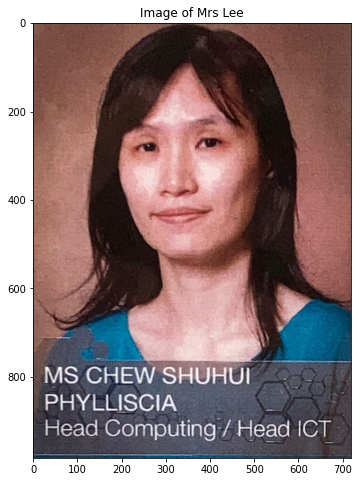

Image of Mrs Lee - Retrieved from Mrs Lee.jpeg with Shape (984, 719, 3)

In [ ]:
img = Image.read("Mrs Lee.jpeg")
img

# Data Cleaning
Data is already beautiful, so we don't need to perform cleaning.

# Data Exploration

We will now explore the image from different angles to try and spot any correlation.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


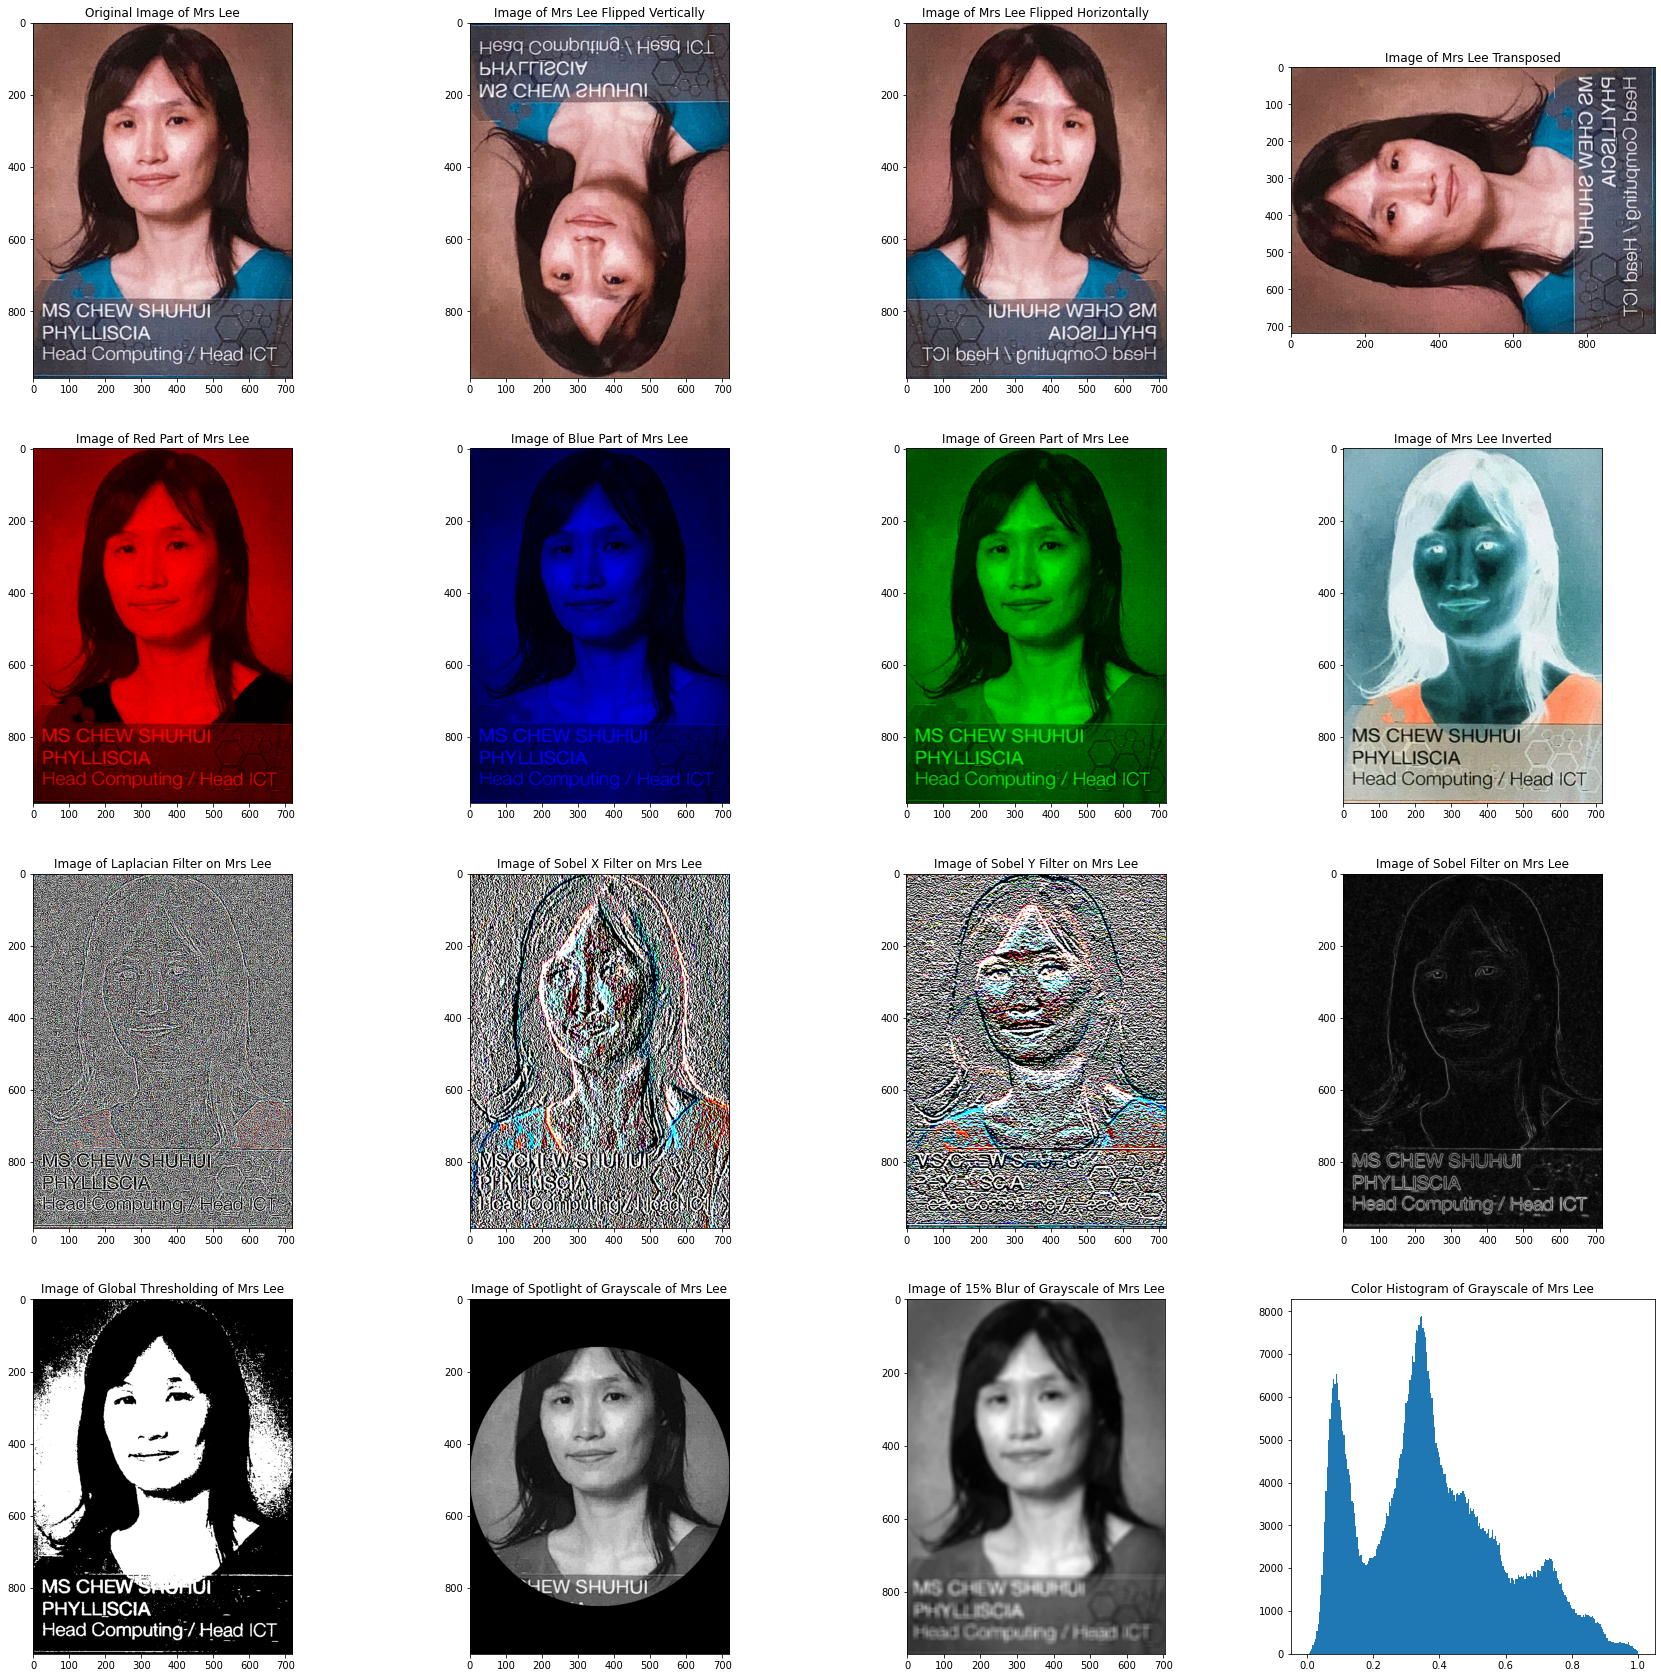

In [ ]:
img.createImageReport()

(0.07768710009226305, 1.9330365737346728e-91)

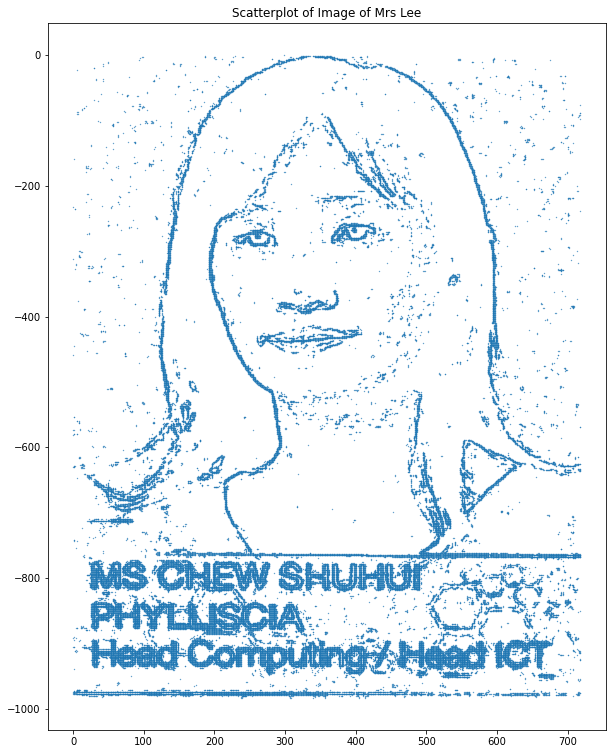

In [ ]:
img.scatter()

# Conclusions

As the pearson-r-value coefficient is low and the P-value is high, we can conclude that there is most probably no relationship on Mrs Lee's face.